# Youtube Vaccine Comments Report
# Author: Alex Hillwig

## Overview
In this report, I want to analyze the data of commenters on youtube that are talking about vaccines and that have any anti-vaccine sentiments.

My hypothesis is that comments that contain mentions of metals such as aluminum, mercury and lead will also have a higher likelihood to contain mentions of autism.

## Data

For this report, I used a CSV file of collected Youtube Data between the dates of December 14, 2020 and December 16, 2020 that was provided to my by Professor Silva, who is just the coolest guy. The data comes from the Youtube API.

To begin I had to load in the various systems I would be using for my analysis, including pandas for datasets, nltk to parse the words from the data set and sort or remove certain words, counter to collect how many of each word there are, and pyplot to visualize the data.

In [2]:
import pandas as pd
import nltk
from datetime import datetime as dt
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string
from collections import Counter
from matplotlib import pyplot as plt

I then had to read in the csv file that was provided to me, and then look at the keys to see what I may want to sort the data by.

In [3]:
you_uniq = pd.read_csv(r"C:\Users\jchil\Downloads\YouTubeVaccination_Dec14-Dec26_2021_fixed.csv")
you_uniq.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

I then wanted to read only the english words from the data set, as it was the only language I can parse through to pull my conclusions from.

In [4]:
en_only = you_uniq.loc[you_uniq['Language'] == 'en']
en_only

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


In [5]:
en_only['Full Text'].head()

0    I got the Moderna vaccine, hereâ€™s my list of...
1    @Charlotte Haggerty Do you really believe ever...
2    I hate it when they say "You don't want a covi...
3    @Sweet Heart Well, Quantas, an Australian airl...
4    @AngryAngy Here they recommend a flu shot duri...
Name: Full Text, dtype: object

Lowercase all english text to make it more readable

In [6]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head(20)

0     i got the moderna vaccine, hereâ€™s my list of...
1     @charlotte haggerty do you really believe ever...
2     i hate it when they say "you don't want a covi...
3     @sweet heart well, quantas, an australian airl...
4     @angryangy here they recommend a flu shot duri...
5     we don't need a corona vaccine, we need a come...
6     i had no idea of who this guy was prior to thi...
7     @angryangy zero medical test is done before se...
8     @justin kirschenman i don't know about your lo...
9     remember when the french scientist said test a...
10    @angryangy i've only said to limit vaccines an...
11    use your brain please , samiitb so many people...
12    @krish soni , i am assuming that english isn't...
13    the south african variant is the one to keep y...
14                part of the satan gates vaccine club!
15    enough of the lies already. it is patently rid...
16    @angryangy america has a different schedule. a...
17    i love the jre, but joe is pretty careless

Tokenize or assign each word to a string

In [7]:
en_only['tokens'] = [tk.word_tokenize(x) for x in en_only['text_lower']]
en_only['tokens'][1]

['@',
 'charlotte',
 'haggerty',
 'do',
 'you',
 'really',
 'believe',
 'everything',
 'your',
 'told',
 '?',
 'no',
 ',',
 'the',
 'vaccines',
 'will',
 'not',
 'end',
 'the',
 'pandemic',
 '.',
 'herd',
 'immunization',
 'is',
 'what',
 'will',
 'do',
 'it',
 '.',
 'however',
 ',',
 'they',
 'will',
 'claim',
 'that',
 'it',
 'is',
 'the',
 'vaccine',
 'that',
 'did',
 'it',
 '.',
 'the',
 'virus',
 'will',
 'be',
 'gone',
 'by',
 'august',
 ',',
 'btw',
 '.']

Begin to remove certain words from the datset that don't matter to the analysis

In [8]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s'")

filter by those stopwords and append it to the 'filtered' column

In [9]:
filtered = []
for i in en_only['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_only['filtered'] = filtered

In [10]:
en_only['filtered'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 '?',
 'well',
 ',',
 'worked',
 'smallpox',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'yeah',
 "'s",
 'difference',
 ':',
 'covid',
 'even',
 '0.1',
 '%',
 'deadly',
 'smallpox',
 'example',
 '.',
 "'s",
 'issue',
 '.',
 "'m",
 'definitely',
 'vaccines',
 ',',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 '.',
 'vaccinate',
 'everything',
 '?',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Now that the stopwords have been removed, the punctuation that is still in the set is taking up a lot of room, so remove the punctuation and append the 'no_punct' column

In [11]:
no_punct = []
for i in en_only['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_only['no_punct'] = no_punct
en_only['no_punct'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 'well',
 'worked',
 'smallpox',
 'polio',
 "''",
 'yeah',
 "'s",
 'difference',
 'covid',
 'even',
 '0.1',
 'deadly',
 'smallpox',
 'example',
 "'s",
 'issue',
 "'m",
 'definitely',
 'vaccines',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 'vaccinate',
 'everything',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Display just the date column and the Full Text column to decide what strings I might search by to find anti-vacination comments

In [63]:
en_only[['no_punct']].head()

,no_punct
0,"[got, moderna, vaccine, hereâ€™s, list, side, effects, https, //youtu.be/9swygynujao]"
1,"[charlotte, haggerty, really, believe, everything, told, vaccines, end, pandemic, herd, immunization, however, claim, vaccine, virus, gone, august, btw]"
2,"[hate, say, ``, want, covid, vaccine, well, worked, smallpox, polio, '', yeah, 's, difference, covid, even, 0.1, deadly, smallpox, example, 's, issue, 'm, definitely, vaccines, would, stupid, great, advancement, mankind, vaccinate, everything, mean, cmon, ..., support, covid, vaccinations, people, older, 65, etc, definitely, people, ages, 0-35, ...]"
3,"[sweet, heart, well, quantas, australian, airline, already, made, one, fly, unless, stamp, passport, showing, got, vaccine, next, maybe, tattoo, hand, look, china, already, citizens, controlling, moves, something, wrong, get, strike, meaning, wo, allowed, supermarket, public, places, airport, vaccine, one, step, get, u.n., 2030, agenda, ...., look, want]"
4,"[angryangy, recommend, flu, shot, pregnancy, babies, 6, months, year, flu, shot, multiple, dose, flu, vaccine, still, contains, mercury, give, flu, vaccine, walmart, local, grocery, store, flu, vaccine, biggest, paid, vaccine, injuries, 50,000, influenza, deaths, year, america, legal, slavery, prison, constitution, poor, communities, clean, water, america, either, lead, water, aluminum, salts, food, injected, heavy, metals, creating, profit, prison, system, may, single, vaccine, caused, daughters, autism, 8, since, 1990s, autism, increased, much, since, many, ca, sued, vaccine, profit, vaccine, sold, creates, billions, year, percentage, profits, get, system, vaccine, injuries]"


Now I search by the no_punct column for those that contain certain strings (lead, aluminum, or mercury) and add them to a new dataframe and count them for plotting later

In [42]:
searched_lead_df = en_only[en_only['no_punct'].astype(str).str.contains("lead")]
lead_count = len(searched_lead_df)
searched_mercury_df = en_only[en_only['no_punct'].astype(str).str.contains("mercury")]
mercury_count = len(searched_mercury_df)
searched_aluminum_df = en_only[en_only['no_punct'].astype(str).str.contains("aluminum")]
aluminum_count = len(searched_aluminum_df)
searched_metals_df = en_only[en_only['no_punct'].astype(str).str.contains("aluminum|mercury|lead")]

I then wanted to search this dataframe and extract only the rows that also contain mentions of autism and those that contain mentions of both metals and autism.

In [44]:
searched_autism_df = searched_df[searched_df['no_punct'].astype(str).str.contains("autism")]
autism_count = len(searched_autism_df)
searched_metalsandautism_df = searched_metals_df[searched_metals_df['no_punct'].astype(str).str.contains("autism")]
combined_count = len(searched_metalsandautism_df)

Now I want to show this data in a more clear manner as a pie chart:

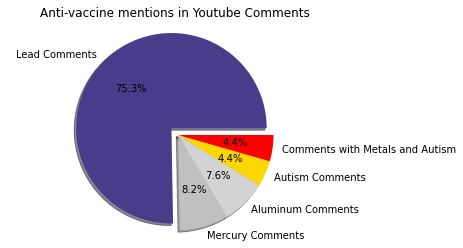

In [61]:
my_data = [lead_count, mercury_count, aluminum_count, autism_count, combined_count]
my_labels = ['Lead Comments', 'Mercury Comments', 'Aluminum Comments', 'Autism Comments', 'Comments with Metals and Autism']
my_colors = ['darkslateblue','silver','lightgrey', 'gold', 'red']
my_explode = [0.1, 0, 0, 0, 0]
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', shadow = True, colors=my_colors, explode=my_explode)
plt.title('Anti-vaccine mentions in Youtube Comments')
plt.axis('equal')
plt.show()

## Analysis

The analysis revealed that the majority of comments contained mentions of the metal lead over other metals and that not many comments containd metals and mentions of autism.

## Conclusions, Limitations, Alternative Approaches, & Next Steps

As I analyzed the data, I discovered that there were remarkably fewer comments that mentioned autism and metals together. This surprised me, as in pop culture, you see many mentions of thos who are against vaccinations believing that they and the metals contained within have a connection to autism in children.

From this I can state that my hypothesis that comments that contain mentions of metals will also contain mentions of autism is wrong, with more comments simply mentioning metals in vaccines over their correlation to autism in children.

One surprising fact coming out of this is that a majority of comments mentioned lead over other metals, leading me to believe that a general consensus among the Anti-vaccine commenters is that lead is found abundantly in vaccines.

In the future, I could compare the mentions of metals to the negative tokens of words such as 'deadly' and 'die' to find if there is a correlation between the sentiment of vaccines having metals in them and negative side effects.